In [2]:
#Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [3]:
#Read the dataset:
data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [4]:
#Print the column names of our data:
print(data.columns)

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')


In [5]:
#Additional info about our dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [6]:
#Statistical info about our dataset:
data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


AxesSubplot(0.125,0.125;0.775x0.755)


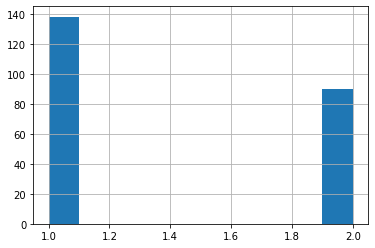

In [7]:
#Plot histogram for sex of patient:
print (data["sex"].hist())

In [8]:
#Create an object of KaplanMeierFitter:
kmf = KaplanMeierFitter() 

In [9]:
#Organize our data:
#If status = 1 , then dead = 0
#If status = 2 , then dead = 1
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [10]:
#Fit the parameter values in our object:
kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [11]:
#Print the event table:
kmf.event_table
# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [12]:
#Calculating the survival probability for a given time:
event_at_0 = kmf.event_table.iloc[0,:]

In [13]:
#Calculate the survival probability for t=0:
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [14]:
#Calculating the survival probability for a given time:
event_at_5 = kmf.event_table.iloc[1,:]

In [15]:
#Calculate the survival probability for t=5:
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

0.9956140350877193

In [16]:
#Calculating the survival probability for a given time:
event_at_11 = kmf.event_table.iloc[2,:]

In [17]:
#Calculate the survival probability for t=11:
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.986784140969163

In [18]:
#Calculating the actual survival probability at a given time:
surv_after_0 = surv_for_0 
print("Survival Probability After 0 Days: ",surv_after_0)

Survival Probability After 0 Days:  1.0


In [19]:
#Calculating the actual survival probability at a given time:
surv_after_5 = surv_for_0 * surv_for_5
print("Survival Probability After 5 Days: ",surv_after_5)

Survival Probability After 5 Days:  0.9956140350877193


In [23]:
#Calculating the actual survival probability at a given time:
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
print("Survival Probability After 11 Days: ",surv_after_11)

Survival Probability After 11 Days:  0.9824561403508771


In [24]:
#Get the probability values the easy way!
print("Survival probability for t=0: ",kmf.predict(0))
print("Survival probability for t=5: ",kmf.predict(5))
print("Survival probability for t=11: ",kmf.predict(11))

Survival probability for t=0:  1.0
Survival probability for t=5:  0.9956140350877193
Survival probability for t=11:  0.9824561403508766


In [25]:
#Predicting the surviaval probability for an array of value:
kmf.predict([0,5,11,12])

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64

In [26]:
#To get the full list:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


Text(0, 0.5, 'Probability of survival')

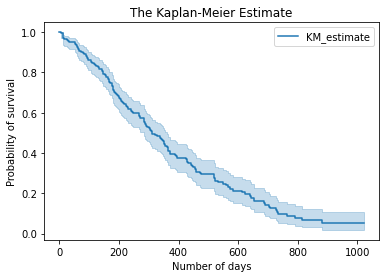

In [27]:
#Plot the graph:
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.xlabel("Number of days")
plt.ylabel("Probability of survival")

In [28]:
#The median number of days:
print("The median survival time: ",kmf.median_survival_time_)

The median survival time:  310.0


In [29]:
#Survival probability with confidence interval:
kmf.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


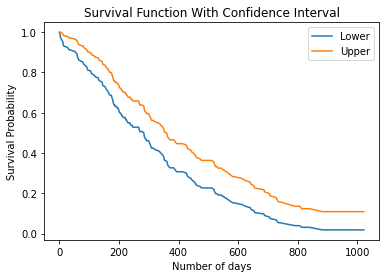

In [30]:
#Plot survival function with confidence interval:
confidence_surv_func = kmf.confidence_interval_survival_function_
plt.plot(confidence_surv_func["KM_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [31]:
#Probabaility of a subject dying:
#p(1022) = p(0) +......+p(1022)
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


Text(0, 0.5, "Probability of person's death")

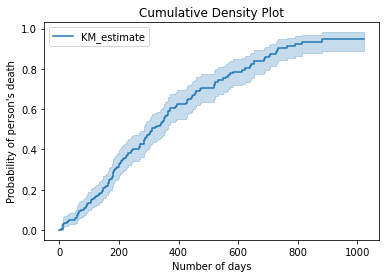

In [32]:
#Plot the cumulative density graph:
kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot")
plt.xlabel("Number of days")
plt.ylabel("Probability of person's death")

In [33]:
#Cumulative density with confidence interval:
kmf.confidence_interval_cumulative_density_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.030723,0.000619
11.0,0.046065,0.006621
12.0,0.051880,0.009187
13.0,0.063318,0.014756
...,...,...
840.0,0.969272,0.876940
883.0,0.982134,0.891338
965.0,0.982134,0.891338
1010.0,0.982134,0.891338


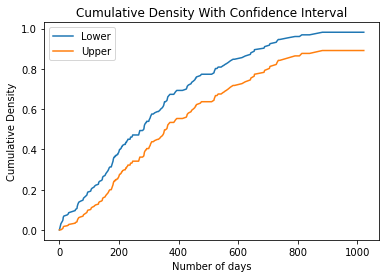

In [34]:
#Plot cumulative density with confidence interval:
confidence_cumulative_density = kmf.confidence_interval_cumulative_density_
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_lower_0.95"],label="Lower")
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative Density With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Density")
plt.legend()

In [35]:
#Find cumulative density at a specific time:
kmf.cumulative_density_at_times(times=1022)

1022    0.949654
Name: KM_estimate, dtype: float64

In [36]:
#Conditional median time to event of interest:
kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,310.0
5.0,305.0
11.0,309.0
12.0,308.0
13.0,316.0
...,...
840.0,inf
883.0,inf
965.0,inf


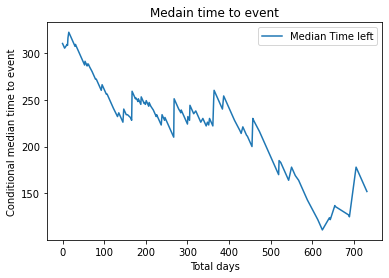

In [37]:
#Conditional median time left for event:
median_time_to_event = kmf.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [38]:
#Hazard function:
from lifelines import NelsonAalenFitter

In [39]:
#Create an object of NelsonAalenFitter:
naf = NelsonAalenFitter()

In [40]:
#Fit our data into the object:
naf.fit(data["time"], event_observed=data["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [41]:
#Print the cumulative hazard:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


Text(0, 0.5, "Cumulative Probability of person's death")

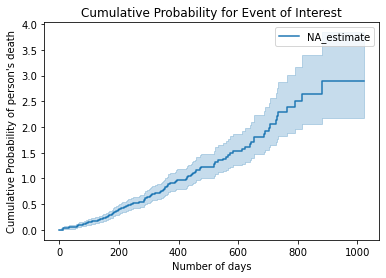

In [42]:
#Plot the cumulative hazard grpah:
naf.plot_cumulative_hazard()
plt.title("Cumulative Probability for Event of Interest")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Probability of person's death")

In [43]:
#We can predict the value at a certain point :
print("Time = 500 days: ",naf.predict(500))
print("Time = 1022 days: ",naf.predict(1022))

Time = 500 days:  1.219546171331098
Time = 1022 days:  2.8915648373471052


In [44]:
#Cumulative hazard with confidence interval:
naf.confidence_interval_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.000618,0.031136
11.0,0.006628,0.047055
12.0,0.009209,0.053156
13.0,0.014832,0.065266
...,...,...
840.0,2.058738,3.389389
883.0,2.176987,3.840697
965.0,2.176987,3.840697
1010.0,2.176987,3.840697


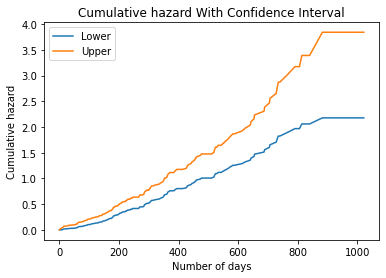

In [45]:
#Plot cumulative hazard with confidence interval:
confidence_interval = naf.confidence_interval_
plt.plot(confidence_interval["NA_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_interval["NA_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative hazard With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative hazard")
plt.legend()

Text(0.5, 0, 'Number of Days')

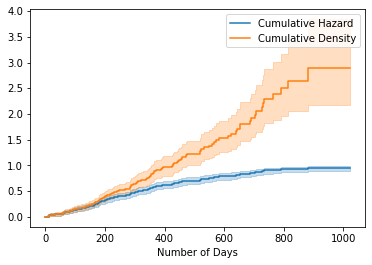

In [46]:
#Plot the cumulative_hazard and cumulative density:
kmf.plot_cumulative_density(label="Cumulative Hazard")
naf.plot_cumulative_hazard(label="Cumulative Density")
plt.xlabel("Number of Days")